# Assignment2 / 



## Training part

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




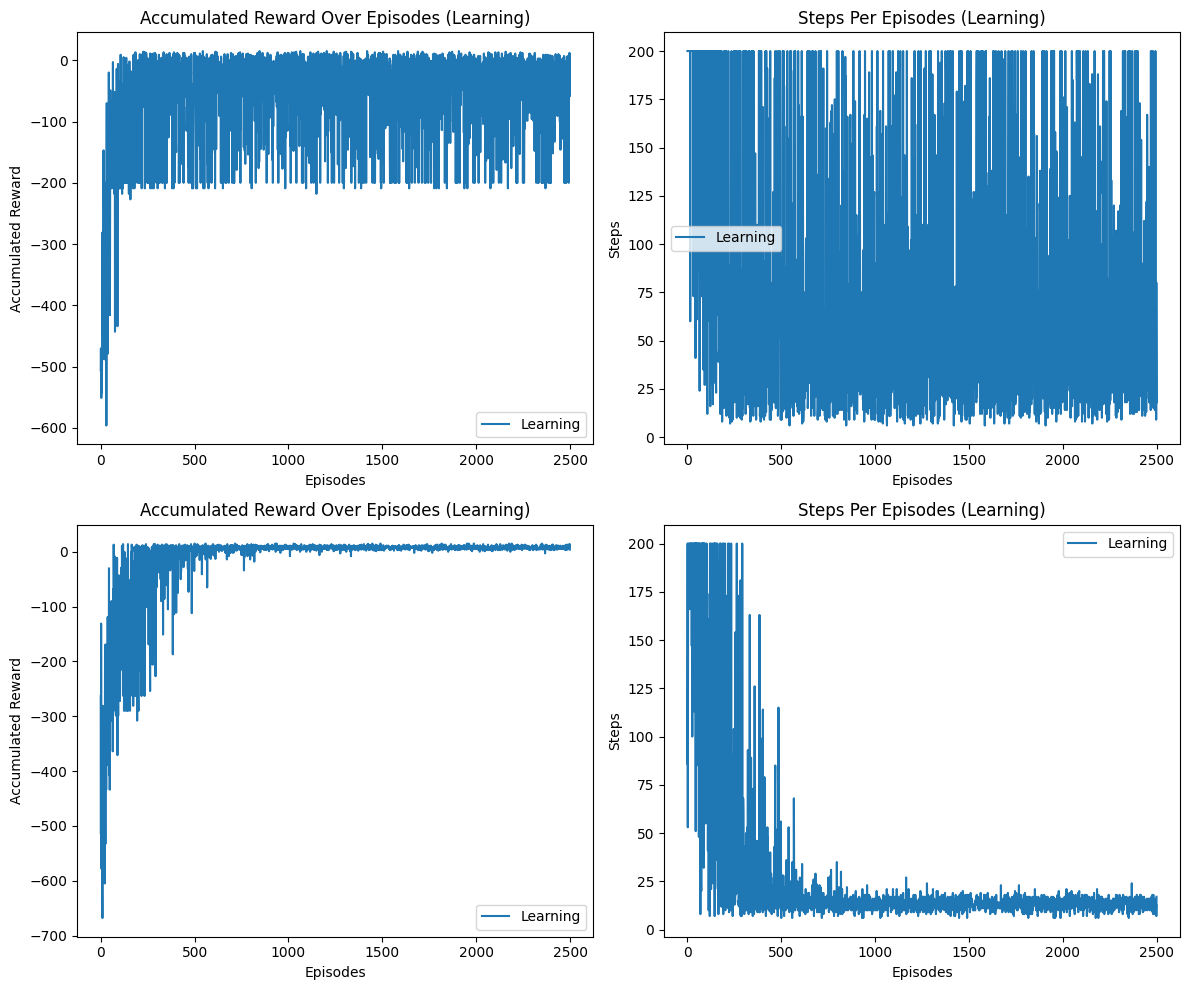

In [2]:
import warnings

# Suppress all warnings by overriding the warn function
def warn(*args, **kwargs):
    pass

warnings.warn = warn

import gym
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Taxi-v3 environment with ANSI render mode for textual rendering
env = gym.make("Taxi-v3", render_mode="ansi")
state = env.reset()
rendered_env = env.render()
print(rendered_env)

# Define the softmax function to calculate action selection probabilities
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Calculate the exponentials
    return e_x / e_x.sum(axis=0)  # Normalize to get probabilities

# Select an action using the softmax policy
def select_action_softmax(q_table, state, epsilon):
    action_probabilities = softmax(q_table[state] / epsilon)  # Compute action probabilities
    action = np.random.choice(len(action_probabilities), p=action_probabilities)  # Select action based on probabilities
    return action

# Q-learning algorithm implementation
def q_learning(env, num_episodes, alpha, gamma, epsilon, epsilon_decay):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])  # Initialize Q-table
    rewards = []  # Store rewards for each episode
    steps = []  # Store the number of steps for each episode

    for i in range(num_episodes):
        state = env.reset()  # Reset environment for each episode
        state = state[0] if isinstance(state, tuple) else state  # Handle tuple state
        done = False
        total_rewards = 0
        total_steps = 0

        while not done and total_steps < 200:  # Limit the maximum steps to 200
            action = select_action_softmax(q_table, state, epsilon)  # Select action using softmax policy
            next_state, reward, terminated, truncated, _ = env.step(action)  # Take action and observe result
            next_state = next_state[0] if isinstance(next_state, tuple) else next_state  # Handle tuple state
            done = terminated or truncated  # Determine if episode is done

            old_value = q_table[state, action]  # Current Q-value
            next_max = np.max(q_table[next_state])  # Maximum Q-value for the next state

            # Update Q-value using the Q-learning update rule
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            state = next_state  # Move to the next state
            total_rewards += reward  # Accumulate reward
            total_steps += 1  # Count steps

        rewards.append(total_rewards)  # Store total rewards for this episode
        steps.append(total_steps)  # Store total steps for this episode
        epsilon = max(epsilon * epsilon_decay, 0.01)  # Decay epsilon

    return q_table, rewards, steps

# SARSA algorithm implementation
def sarsa(env, num_episodes, alpha, gamma, epsilon, epsilon_decay):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])  # Initialize Q-table
    rewards = []  # Store rewards for each episode
    steps = []  # Store the number of steps for each episode

    for i in range(num_episodes):
        state = env.reset()  # Reset environment for each episode
        state = state[0] if isinstance(state, tuple) else state  # Handle tuple state
        done = False
        total_rewards = 0
        total_steps = 0
        
        action = select_action_softmax(q_table, state, epsilon)  # Select initial action using softmax policy

        while not done and total_steps < 200:  # Limit the maximum steps to 200
            next_state, reward, terminated, truncated, _ = env.step(action)  # Take action and observe result
            next_state = next_state[0] if isinstance(next_state, tuple) else next_state  # Handle tuple state
            done = terminated or truncated  # Determine if episode is done
            
            next_action = select_action_softmax(q_table, next_state, epsilon)  # Select next action using softmax policy
            
            old_value = q_table[state, action]  # Current Q-value
            next_value = q_table[next_state, next_action]  # Q-value for the next state-action pair
            
            # Update Q-value using the SARSA update rule
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_value)
            q_table[state, action] = new_value
            
            state = next_state  # Move to the next state
            action = next_action  # Update action
            total_rewards += reward  # Accumulate reward
            total_steps += 1  # Count steps
        
        rewards.append(total_rewards)  # Store total rewards for this episode
        steps.append(total_steps)  # Store total steps for this episode
        epsilon = max(epsilon * epsilon_decay, 0.01)  # Decay epsilon

    return q_table, rewards, steps

# Plot the results for Q-learning and SARSA
def plot_results(q_learning_rewards, sarsa_rewards, q_learning_steps, sarsa_steps):
    episodes = range(len(q_learning_rewards))

    plt.figure(figsize=(12, 10))

    # Plot Q-learning rewards
    plt.subplot(221)
    plt.plot(episodes, q_learning_rewards, label='Learning')
    plt.xlabel('Episodes')
    plt.ylabel('Accumulated Reward')
    plt.legend()
    plt.title('Accumulated Reward Over Episodes (Learning)')

    # Plot Q-learning steps
    plt.subplot(222)
    plt.plot(episodes, q_learning_steps, label='Learning')
    plt.xlabel('Episodes')
    plt.ylabel('Steps')
    plt.legend()
    plt.title('Steps Per Episodes (Learning)')

    # Plot SARSA rewards
    plt.subplot(223)
    plt.plot(episodes, sarsa_rewards, label='Learning')
    plt.xlabel('Episodes')
    plt.ylabel('Accumulated Reward')
    plt.legend()
    plt.title('Accumulated Reward Over Episodes (Learning)')

    # Plot SARSA steps
    plt.subplot(224)
    plt.plot(episodes, sarsa_steps, label='Learning')
    plt.xlabel('Episodes')
    plt.ylabel('Steps')
    plt.legend()
    plt.title('Steps Per Episodes (Learning)')

    plt.tight_layout()
    plt.show()

# Training parameters
num_episodes = 2500

# Q-learning hyperparameters
alpha_q_learning = 0.915
gamma_q_learning = 0.745
epsilon_q_learning = 1.0
epsilon_decay_q_learning = 1.0

# SARSA hyperparameters
alpha_sarsa = 0.517
gamma_sarsa = 0.911
epsilon_sarsa = 1.0
epsilon_decay_sarsa = 1.0

# Train Q-learning agent
q_table_q_learning, q_learning_rewards, q_learning_steps = q_learning(env, num_episodes, alpha_q_learning, gamma_q_learning, epsilon_q_learning, epsilon_decay_q_learning)

# Train SARSA agent
q_table_sarsa, sarsa_rewards, sarsa_steps = sarsa(env, num_episodes, alpha_sarsa, gamma_sarsa, epsilon_sarsa, epsilon_decay_sarsa)

# Plot results
plot_results(q_learning_rewards, sarsa_rewards, q_learning_steps, sarsa_steps)

# Save Q-tables
np.save('q_table_q_learning.npy', q_table_q_learning)
np.save('q_table_sarsa.npy', q_table_sarsa)



## Test script 

In [2]:
import gym
import numpy as np

# Function to evaluate an agent using a given Q-table over multiple episodes
def evaluate_agent(env, q_table, num_episodes):
    total_rewards = 0  # Initialize total rewards
    total_steps = 0  # Initialize total steps
    
    for _ in range(num_episodes):
        state = env.reset()  # Reset environment for each episode
        state = state[0] if isinstance(state, tuple) else state  # Handle tuple state if present
        done = False
        steps = 0  # Initialize step counter for this episode
        rewards = 0  # Initialize reward counter for this episode
        
        while not done and steps < 200:  # Limit the maximum steps to 200
            action = np.argmax(q_table[state])  # Select action with highest Q-value (greedy action selection)
            next_state, reward, terminated, truncated, _ = env.step(action)  # Take action and observe result
            next_state = next_state[0] if isinstance(next_state, tuple) else next_state  # Handle tuple state if present
            done = terminated or truncated  # Determine if episode is done
            rewards += reward  # Accumulate rewards
            state = next_state  # Move to the next state
            steps += 1  # Count steps
        
        total_rewards += rewards  # Accumulate total rewards for all episodes
        total_steps += steps  # Accumulate total steps for all episodes
    
    avg_reward = total_rewards / num_episodes  # Calculate average reward per episode
    avg_steps = total_steps / num_episodes  # Calculate average steps per episode
    
    return avg_reward, avg_steps  # Return the average reward and steps

# Function to test Q-learning and SARSA agents using their respective Q-tables
def test_agent(env, q_learning_file, sarsa_file, num_test_episodes):
    # Load Q-tables from files
    q_table_q_learning = np.load(q_learning_file)
    q_table_sarsa = np.load(sarsa_file)

    # Evaluate Q-learning agent
    avg_reward_q_learning, avg_steps_q_learning = evaluate_agent(env, q_table_q_learning, num_test_episodes)

    # Evaluate SARSA agent
    avg_reward_sarsa, avg_steps_sarsa = evaluate_agent(env, q_table_sarsa, num_test_episodes)

    # Print evaluation results
    print(f"Q-learning: Average Reward: {avg_reward_q_learning}, Average Steps: {avg_steps_q_learning}")
    print(f"SARSA: Average Reward: {avg_reward_sarsa}, Average Steps: {avg_steps_sarsa}\n")

# Set up the testing environment
env = gym.make("Taxi-v3", render_mode="ansi")

# Define the number of test episodes
num_test_episodes = 100

# Load and test the agents
test_agent(env, 'q_table_q_learning.npy', 'q_table_sarsa.npy', num_test_episodes)


Q-learning: Average Reward: 8.13, Average Steps: 12.87
SARSA: Average Reward: 7.94, Average Steps: 13.06




## Visualization

In [3]:
import gym
import numpy as np

# Function to visualize the agent's behavior using a given Q-table
def visualize_agent(env, q_table):
    state = env.reset()  # Reset environment to the initial state
    state = state[0] if isinstance(state, tuple) else state  # Handle tuple state if present
    done = False  # Initialize the done flag
    step_count = 0  # Initialize step counter
    total_accumulated_reward = 0  # Initialize total accumulated reward

    while not done:
        action = np.argmax(q_table[state])  # Select action with the highest Q-value (greedy action selection)
        next_state, reward, terminated, truncated, _ = env.step(action)  # Take action and observe the result
        next_state = next_state[0] if isinstance(next_state, tuple) else next_state  # Handle tuple state if present
        done = terminated or truncated  # Determine if the episode is done

        # Render the environment and filter out directional information
        rendered_env = env.render()
        lines = rendered_env.split("\n")
        lines = [line for line in lines if not any(direction in line for direction in ["(South)", "(North)", "(East)", "(West)"])]
        rendered_env = "\n".join(lines)
        
        total_accumulated_reward += reward  # Accumulate total reward
        
        print()
        print(rendered_env)  # Print the rendered environment
        print(f"Step {step_count}:")  # Print the step count
        step_count += 1  # Increment the step counter
        print(f"State: {state}, Action: {action}, Reward: {reward}, Total accumulated reward: {total_accumulated_reward}")  # Print state, action, reward, and total accumulated reward
        print("--------------------------")
        
        state = next_state  # Move to the next state

# Set up the testing environment
env = gym.make("Taxi-v3", render_mode="ansi")

# Visualize the Q-learning trained agent
print("Q-learning visualization:")
q_table_q_learning = np.load('q_table_q_learning.npy')  # Load the Q-learning Q-table
visualize_agent(env, q_table_q_learning)  # Visualize the agent's behavior

# Visualize the SARSA trained agent
print("--------------------------")
print("\n\nSARSA visualization:")
q_table_sarsa = np.load('q_table_sarsa.npy')  # Load the SARSA Q-table
visualize_agent(env, q_table_sarsa)  # Visualize the agent's behavior


Q-learning visualization:

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Step 0:
State: 468, Action: 1, Reward: -1, Total accumulated reward: -1
--------------------------

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Step 1:
State: 368, Action: 1, Reward: -1, Total accumulated reward: -2
--------------------------

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Step 2:
State: 268, Action: 3, Reward: -1, Total accumulated reward: -3
--------------------------

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Step 3:
State: 248, Action: 3, Reward: -1, Total accumulated reward: -4
--------------------------

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Step 4:
State: 228, Action: 3, Reward: -1, Total accumulated reward: -5
--------------------------

+---------+
|R: | : :G|
| : | : : |
| : : : : |
